# Linear approximation

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
def show_linear_plot(x: np.ndarray, y: np.ndarray, x_lin: np.ndarray, y_lin: np.ndarray, label:str, pts_type='o',
                     pts_color='r', pts_label='Points', pts_size=10, plot_color='b', plot_type='-', plot_linew=2) -> None:
    fig, _ = plt.subplots(figsize=(9, 7))
    
    plt.plot(x_lin, y_lin, plot_color+plot_type, label=label, linewidth=plot_linew)
    
    plt.plot(x, y, pts_color+pts_type, markersize=5, label=pts_label)
    plt.title('ƒ(x) approximation', fontsize=25)
    plt.xlabel('x', fontsize=15)
    plt.ylabel('y', fontsize=15)
    plt.minorticks_on()
    plt.legend(loc='best', fontsize=13)
    fig.tight_layout()
    plt.show()

## $ f(x) = kx $

In [20]:
%%timeit

# Input data
x = np.float64([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.float64([50, 55, 51, 54, 49, 56, 52, 53, 50, 55])

# Сalculation argmin
a, b = (x ** 2).mean(), (-2 * x * y).mean()
k = -b / (2 * a)

19.9 µs ± 774 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


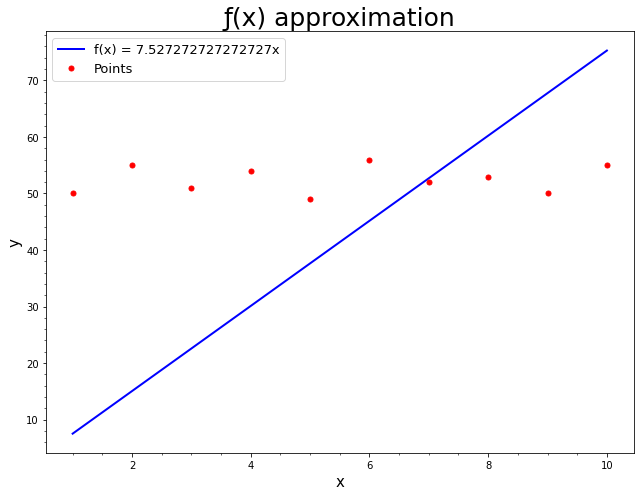

In [22]:
x_lin = np.linspace(x.min(), x.max(), 1000)
y_lin = k * x_lin
label = f'f(x) = {k}x'
show_linear_plot(x, y, x_lin, y_lin, label)

## $ f(x) = kx + b $

In [26]:
%%timeit

# Input data
x = np.float64([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.float64([50, 55, 51, 54, 49, 56, 52, 53, 50, 55])

# Ak^2 + Bkb + Cb^2 + Dk + Eb + F
A, B, C, D, E = (x ** 2).mean(), (2 * x).mean(), 1, (-2 * x * y).mean(), (-2 * y).mean()

# {2Ak + Bb = -D
# {Bb + 2Cb = -E
a = np.array([[2*A, B], [B, 2*C]])
b = np.array([-D, -E])
k, b = np.linalg.solve(a, b)

51.5 µs ± 1.96 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


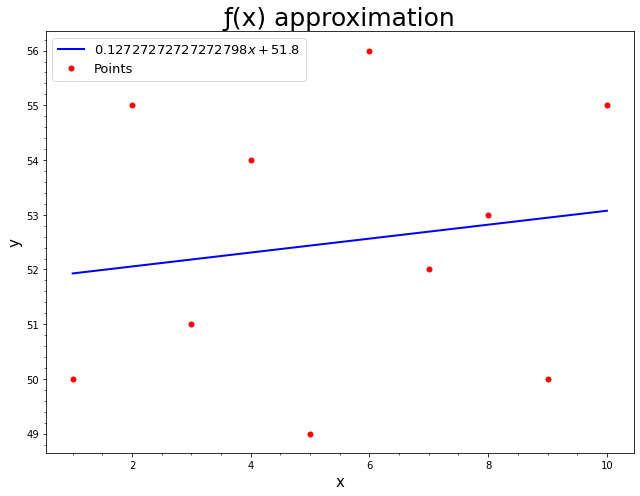

In [25]:
x_lin = np.linspace(x.min(), x.max(), 1000)
y_lin = k * x_lin + b
label = f'$ {k}x + {b} $'
show_linear_plot(x, y, x_lin, y_lin, label)

## $ f(x) = ksin(x) + b $

In [31]:
%%timeit

# Input data
x = np.float64([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.float64([50, 55, 51, 54, 49, 56, 52, 53, 50, 55])

# Ak^2 + Bkb + Cb^2 + Dk + Eb + F
A, B, C, D, E = (np.sin(x) ** 2).mean(), (2 * np.sin(x)).mean(), 1, (-2 * np.sin(x) * y).mean(), (-2 * y).mean()

# {2Ak + Bb = -D
# {Bb + 2Cb = -E
a = np.array([[2*A, B], [B, 2*C]])
b = np.array([-D, -E])
k, b = np.linalg.solve(a, b)

52 µs ± 1.03 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


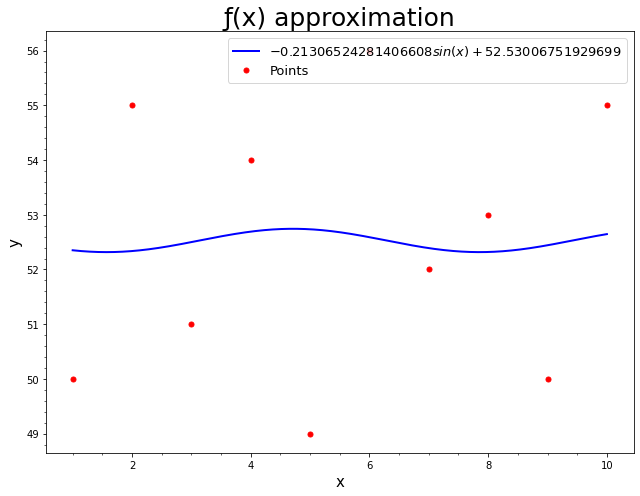

In [30]:
x_lin = np.linspace(x.min(), x.max(), 1000)
y_lin = k * np.sin(x_lin) + b
label = f'$ {k}sin(x) + {b} $'
show_linear_plot(x, y, x_lin, y_lin, label)